In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift
import seaborn as sns; sns.set()
import csv
from folium import plugins

In [2]:
from Book_extraction_single import search_for_file_path

In [3]:
path_file, base=search_for_file_path ()

You chose: C:/Users/aleja/Documents/Progetto/ProjectWork/back-end-python/src/Data/Geocode_Follett, Ken - Hornet Flight.csv


In [4]:
base

'Geocode_Follett, Ken - Hornet Flight'

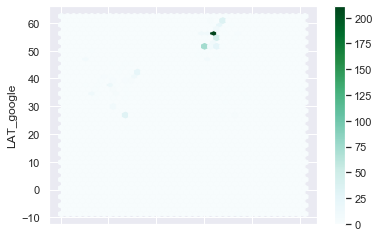

In [5]:
#df = pd.read_csv('Data/Data_Book_Geocode.csv')
df = pd.read_csv(path_file)
df.head(5)
df.dropna(axis=0,how='any',subset=['LAT_google','LON_google'],inplace=True)
len(df)
df.head(5)

#df=df.drop(['Unnamed: 0', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14'], axis=1)
df
ax = df.plot.hexbin(x='LON_google', y='LAT_google', gridsize=40)

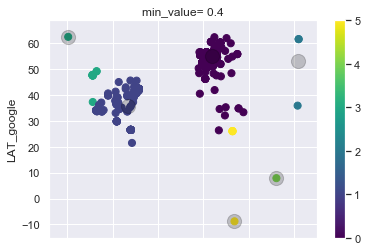

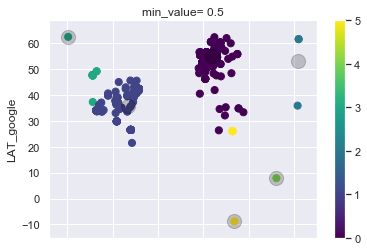

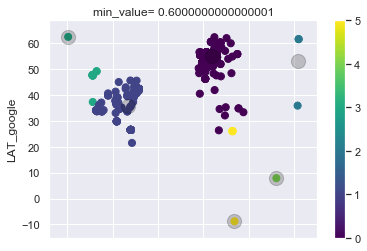

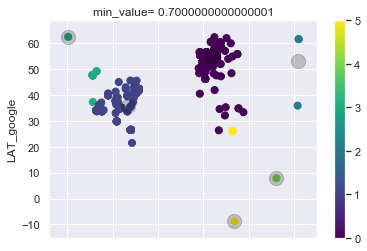

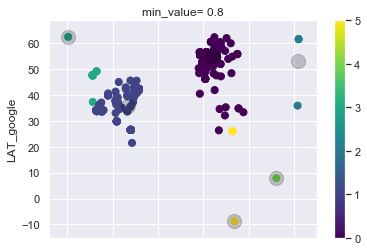

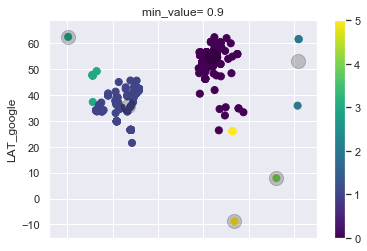

In [14]:
#kmeans = KMeans(n_clusters = 3, init ='k-means++')
f=0
limit=6
for k in range(limit):
    if k==limit-2:
            min_value=0.8
    else:
        min_value=0.4+f
    centers=[]
    labels=[]
    model = MeanShift()
    model.fit(df[df.columns[2:4]]) # Compute k-means clustering.
    df['cluster_label'] = model.fit_predict(df[df.columns[2:4]])
    centers = model.cluster_centers_ # Coordinates of cluster centers.
    labels = model.predict(df[df.columns[2:4]]) # Labels of each point
    df.plot.scatter(x = 'LON_google', y = 'LAT_google', c=labels, s=50, cmap='viridis')
    plt.scatter(centers[:, 1], centers[:, 0], c='black', s=200, alpha=0.2)
    plt.title('min_value= ' + str(min_value))
    counts_clusters=df.groupby(['cluster_label']).size()
    #df=df.loc[(df['cluster_label'] !=label_cl)]
    clusters_DF=pd.DataFrame(counts_clusters)
    clusters_DF=clusters_DF.sort_values(0, ascending=[False])
    clusters_DF['normalized']=clusters_DF[0].div(clusters_DF[0].sum())
    clusters_DF["cluster_label"]=clusters_DF.index
    #print(clusters_DF.index[0])
    
    cluster_keep=[]
    z=0
    sum_val=0
    
    for i in clusters_DF['normalized']:
        sum_val=clusters_DF['normalized'][0:z].sum()

        if sum_val>min_value:
            cluster_keep.append(clusters_DF.index[0:z])
            break
        
        else:
            z+=1
    cluster_keep=pd.DataFrame(cluster_keep)
    range_1=cluster_keep.size
    datos_clustered = df[df['cluster_label'].isin(clusters_DF['cluster_label'][0:range_1])]
    #plt.scatter(centers[:, 1], centers[:, 0], c='black', s=200, alpha=0.2)
    f=f+0.1

In [15]:
#df = df[df['cluster_label'].isin(clusters_DF['cluster_label'][0:range_1])]
clusters_DF, min_value

(                 0  normalized  cluster_label
 cluster_label                                
 0              508    0.745962              0
 1              153    0.224670              1
 3               11    0.016153              3
 5                5    0.007342              5
 2                3    0.004405              2
 4                1    0.001468              4,
 0.9)

In [12]:
ff=len(df)
import folium
from folium import plugins
# let's start again with a clean copy of the map of San Francisco
Area = folium.Map(location=[df["LAT_google"].mean(), df["LON_google"].mean()], zoom_start=4)
Dots = plugins.MarkerCluster().add_to(Area)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, pos, label, label_2 in zip(df["LAT_google"].iloc[: ff],df["LON_google"].iloc[: ff], df["Position"].iloc[: ff], df["lugares"].iloc[: ff], df["Quotes"].iloc[: ff]):
    if type(lat)!=type(None):
        folium.Marker(
        location=[lat, lng],
        icon=None,
        popup= str(pos)+' '+label + ': "' +label_2 + '"',
    ).add_to(Dots)

# display map
Area
Area.save('Maps/Clean_maps/Geocode_'+ base+ '.html')
df.to_csv("Data/Clean_data/Geocode_" + base + ".csv")

In [13]:
Area

In [105]:
base
#df

'Geocode_Brown, Dan - The Da Vinci Code'

In [106]:
from Analysis_data import cluster_dots, path_dots, plot_path
Datos_clust=cluster_dots(df, base)

FileNotFoundError: [Errno 2] No such file or directory: 'Data/Cleaned_data/Geocode_Geocode_Brown, Dan - The Da Vinci Code.csv'

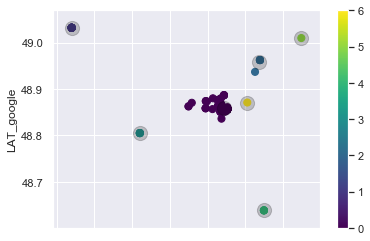

In [107]:
centers=[]
labels=[]
model = MeanShift()
model.fit(df[df.columns[2:4]]) # Compute k-means clustering.
df['cluster_label'] = model.fit_predict(df[df.columns[2:4]])
centers = model.cluster_centers_ # Coordinates of cluster centers.
labels = model.predict(df[df.columns[2:4]]) # Labels of each point
df
df.plot.scatter(x = 'LON_google', y = 'LAT_google', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 1], centers[:, 0], c='black', s=200, alpha=0.2)

In [104]:
counts_clusters=df.groupby(['cluster_label']).size()
#df=df.loc[(df['cluster_label'] !=label_cl)]
clusters_DF=pd.DataFrame(counts_clusters)
clusters_DF=clusters_DF.sort_values(0, ascending=[False])
clusters_DF['normalized']=clusters_DF[0].div(clusters_DF[0].sum())
clusters_DF["cluster_label"]=clusters_DF.index
#print(clusters_DF.index[0])
min_value=0.6
cluster_keep=[]
z=0
sum_val=0
for i in clusters_DF['normalized']:
    sum_val=clusters_DF['normalized'][0:z].sum()
    if sum_val>min_value:
        cluster_keep.append(clusters_DF.index[0:z])
        break
    else:
        z+=1
cluster_keep=pd.DataFrame(cluster_keep)
range_1=cluster_keep.size

In [105]:
clusters_DF, cluster_keep, range_1

(                 0  normalized  cluster_label
 cluster_label                                
 0              220    0.670732              0
 1               85    0.259146              1
 2               18    0.054878              2
 3                1    0.003049              3
 4                1    0.003049              4
 5                1    0.003049              5
 6                1    0.003049              6
 7                1    0.003049              7,
    0
 0  0,
 1)

In [57]:
df_2=df["LON_google"].value_counts(bins=10, normalize=True)
df_3=df["LAT_google"].value_counts(bins=10, normalize=True)

df_2.head(5), df_3.head(5)

((-11.415, 13.302]                  0.547358
 (-85.566, -60.849]                 0.198405
 (-110.283, -85.566]                0.175474
 (-135.24800000000002, -110.283]    0.048853
 (13.302, 38.019]                   0.025922
 Name: LON_google, dtype: float64,
 (36.0, 54.0]    0.867398
 (18.0, 36.0]    0.089731
 (54.0, 72.0]    0.038883
 (72.0, 90.0]    0.000997
 (0.0, 18.0]     0.000997
 Name: LAT_google, dtype: float64)

In [21]:
#Selection of first row only
min_lon=df_2.index[0].left
max_lon=df_2.index[0].right

min_lat=df_3.index[0].left
max_lat=df_3.index[0].right

In [22]:
min_lat, max_lat, min_lon, max_lon

(36.0, 54.0, -11.415, 13.302)

In [77]:
Data_clean=df.loc[(df["LON_google"] > min_lon) & (df["LON_google"] < max_lon) & (df["LAT_google"] > min_lat) & (df["LAT_google"] < max_lat)]

In [78]:
Data_clean

,Unnamed: 0,lugares,LAT_google,LON_google,labels,Quotes,Position,cluster_label
0,621,Royal Observatory Greenwich,51.476853,-0.000500,FAC,For their generous assistance in the research...,0,0
1,412,Paris,48.856614,2.352222,GPE,In 1975 Paris’s Bibliothèque Nationale discove...,1,0
2,771,Vatican,41.902916,12.453389,FAC,The Vatican prelature known as Opus Dei is a ...,2,0
5,413,Paris,48.856614,2.352222,GPE,"PROLOGUE Louvre Museum, Paris 10:46 P",5,0
7,646,Saunière,42.927891,2.262906,LOC,"Grabbing the gilded frame, the seventy-six-yea...",7,0
...,...,...,...,...,...,...,...,...
1092,502,Paris,48.856614,2.352222,GPE,"Turning, he felt his feet again tracing the in...",1092,0
1094,352,Louvre,48.860611,2.337644,FAC,"There in the center, plunging into the earth l...",1094,0
1095,353,Louvre,48.860611,2.337644,LOC,"Tremulous, Langdon walked to the edge and pee...",1095,0
1096,354,Louvre,48.860611,2.337644,FAC,I must go down there! Stepping out of the cir...,1096,0


In [101]:
Data_clean.to_csv("Data_clean.csv")

In [109]:
import folium

In [79]:
from folium import plugins
ff=len(Data_clean)
# let's start again with a clean copy of the map of San Francisco
Area = folium.Map(location=[Data_clean["LAT_google"].mean(), Data_clean["LON_google"].mean()], zoom_start=4)
Dots = plugins.MarkerCluster().add_to(Area)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(Data_clean["LAT_google"].iloc[: ff],Data_clean["LON_google"].iloc[: ff], Data_clean["Quotes"].iloc[: ff]):
    if type(lat)!=type(None):
        folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(Dots)

# display map
Area
Area.save('YourMap.html')

In [91]:
Area = folium.Map(location=[Data_clean["LAT_google"].mean(), Data_clean["LON_google"].mean()], zoom_start=4)


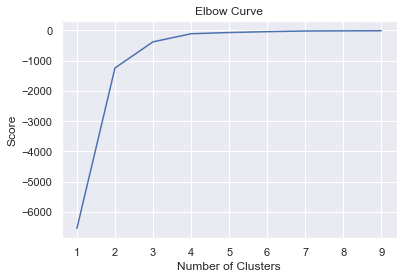

In [27]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = Data_clean[['LAT_google']]
X_axis = Data_clean[['LON_google']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [42]:
kmeans = KMeans(n_clusters = 2, init ='k-means++')
kmeans.fit(Data_clean[Data_clean.columns[2:4]]) # Compute k-means clustering.
Data_clean['cluster_label'] = kmeans.fit_predict(Data_clean[Data_clean.columns[2:4]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(Data_clean[Data_clean.columns[2:4]]) # Labels of each point
Data_clean.head(5)

,Unnamed: 0,lugares,LAT_google,LON_google,labels,Quotes,Position,cluster_label
0,621,Royal Observatory Greenwich,51.476853,-0.000500,FAC,For their generous assistance in the research...,0,0
1,412,Paris,48.856614,2.352222,GPE,In 1975 Paris’s Bibliothèque Nationale discove...,1,0
2,771,Vatican,41.902916,12.453389,FAC,The Vatican prelature known as Opus Dei is a ...,2,1
5,413,Paris,48.856614,2.352222,GPE,"PROLOGUE Louvre Museum, Paris 10:46 P",5,0
7,646,Saunière,42.927891,2.262906,LOC,"Grabbing the gilded frame, the seventy-six-yea...",7,0


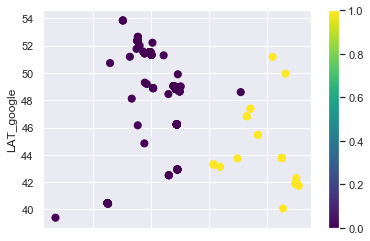

In [43]:
Data_clean.plot.scatter(x = 'LON_google', y = 'LAT_google', c=labels, s=50, cmap='viridis')

In [47]:
df_2=Data_clean["LON_google"].value_counts(bins=2, normalize=True)
df_3=Data_clean["LAT_google"].value_counts(bins=2, normalize=True)

df_2.head(5), df_3.head(5)

((2.238, 12.7]                  0.613767
 (-8.245999999999999, 2.238]    0.386233
 Name: LON_google, dtype: float64,
 (46.617, 53.834]    0.678776
 (39.384, 46.617]    0.321224
 Name: LAT_google, dtype: float64)

In [62]:
label_cl,counts_cl=Data_clean.groupby(['cluster_label']).size().reset_index(name='counts').max()
Data_clean_2=Data_clean.loc[(Data_clean['cluster_label'] !=label_cl)]
Data_clean_2

,Unnamed: 0,lugares,LAT_google,LON_google,labels,Quotes,Position,cluster_label
0,621,Royal Observatory Greenwich,51.476853,-0.000500,FAC,For their generous assistance in the research...,0,0
1,412,Paris,48.856614,2.352222,GPE,In 1975 Paris’s Bibliothèque Nationale discove...,1,0
5,413,Paris,48.856614,2.352222,GPE,"PROLOGUE Louvre Museum, Paris 10:46 P",5,0
7,646,Saunière,42.927891,2.262906,LOC,"Grabbing the gilded frame, the seventy-six-yea...",7,0
9,410,PARIS,48.856614,2.352222,GPE,Where the hell am I? The jacquard bathrobe ha...,9,0
...,...,...,...,...,...,...,...,...
1092,502,Paris,48.856614,2.352222,GPE,"Turning, he felt his feet again tracing the in...",1092,0
1094,352,Louvre,48.860611,2.337644,FAC,"There in the center, plunging into the earth l...",1094,0
1095,353,Louvre,48.860611,2.337644,LOC,"Tremulous, Langdon walked to the edge and pee...",1095,0
1096,354,Louvre,48.860611,2.337644,FAC,I must go down there! Stepping out of the cir...,1096,0


In [164]:
ff=len(df)
from folium import plugins
# let's start again with a clean copy of the map of San Francisco
Area = folium.Map(location=[df["LAT_google"].mean(), df["LON_google"].mean()], zoom_start=4)
Dots = plugins.MarkerCluster().add_to(Area)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df["LAT_google"].iloc[: ff],df["LON_google"].iloc[: ff], df["Quotes"].iloc[: ff]):
    if type(lat)!=type(None):
        folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(Dots)

# display map
Area
Area.save('YourMap_1.html')

   Unnamed: 0                      lugares  LAT_google  LON_google labels  \
0         621  Royal Observatory Greenwich   51.476853   -0.000500    FAC   
1         412                        Paris   48.856614    2.352222    GPE   
5         413                        Paris   48.856614    2.352222    GPE   
7         646                     Saunière   42.927891    2.262906    LOC   
9         410                        PARIS   48.856614    2.352222    GPE   

                                              Quotes  Position  cluster_label  
0   For their generous assistance in the research...         0              1  
1  In 1975 Paris’s Bibliothèque Nationale discove...         1              0  
5              PROLOGUE Louvre Museum, Paris 10:46 P         5              0  
7  Grabbing the gilded frame, the seventy-six-yea...         7              2  
9   Where the hell am I? The jacquard bathrobe ha...         9              0  


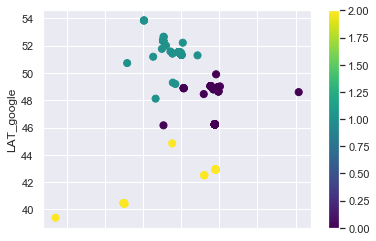

In [65]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(Data_clean_2[Data_clean_2.columns[2:4]]) # Compute k-means clustering.
Data_clean_2['cluster_label'] = kmeans.fit_predict(Data_clean_2[Data_clean_2.columns[2:4]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(Data_clean_2[Data_clean_2.columns[2:4]]) # Labels of each point
print(Data_clean_2.head(5))
Data_clean_2.plot.scatter(x = 'LON_google', y = 'LAT_google', c=labels, s=50, cmap='viridis')

In [76]:
label_cl,counts_cl=Data_clean_2.groupby(['cluster_label']).size().reset_index(name='counts').max()
Data_clean_2=Data_clean_2.loc[(Data_clean_2['cluster_label'] !=label_cl)]
label_cl,counts_cl

(nan, nan)

     Unnamed: 0                      lugares  LAT_google  LON_google labels  \
0           621  Royal Observatory Greenwich   51.476853   -0.000500    FAC   
129         248                       London   51.507351   -0.127758    GPE   
132          92                      England   52.355518   -1.174320    GPE   
133         980           the Royal Holloway   51.425673   -0.563063    FAC   
172          93                      England   52.355518   -1.174320    GPE   

                                                Quotes  Position  \
0     For their generous assistance in the research...         0   
129  Langdon had even given a lecture once at the N...       129   
132  A young Parisiandéchiffreusewho had studied cr...       132   
133  A young Parisiandéchiffreusewho had studied cr...       133   
172  Sophie had come home a few days early from gra...       172   

     cluster_label  
0                0  
129              0  
132              1  
133              0  
172        

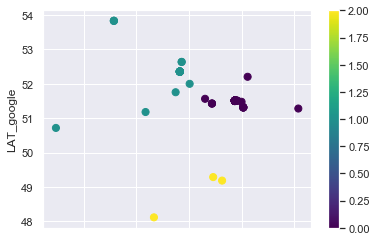

In [68]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(Data_clean_2[Data_clean_2.columns[2:4]]) # Compute k-means clustering.
Data_clean_2['cluster_label'] = kmeans.fit_predict(Data_clean_2[Data_clean_2.columns[2:4]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(Data_clean_2[Data_clean_2.columns[2:4]]) # Labels of each point
print(Data_clean_2.head(5))
Data_clean_2.plot.scatter(x = 'LON_google', y = 'LAT_google', c=labels, s=50, cmap='viridis')